# RBF Networks with Iris Data


Review from Monday:

Training a RBF consists of:
* Finding prototypes
* Selecting the activation function for the hidden nodes
* Selecting the activation function for the output nodes
* Setting the weights for the edges and biases

## Load the Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def typeConverter(x):
    values = ['setosa', 'versicolor', 'virginica']
    return float(values.index(x))


columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]
iris = np.array(np.genfromtxt('data/iris.csv', delimiter=',', converters={4: typeConverter}, skip_header=2, dtype=float, encoding='utf-8'))  
print(iris)

[[5.1 3.5 1.4 0.2 0. ]
 [4.9 3.  1.4 0.2 0. ]
 [4.7 3.2 1.3 0.2 0. ]
 [4.6 3.1 1.5 0.2 0. ]
 [5.  3.6 1.4 0.2 0. ]
 [5.4 3.9 1.7 0.4 0. ]
 [4.6 3.4 1.4 0.3 0. ]
 [5.  3.4 1.5 0.2 0. ]
 [4.4 2.9 1.4 0.2 0. ]
 [4.9 3.1 1.5 0.1 0. ]
 [5.4 3.7 1.5 0.2 0. ]
 [4.8 3.4 1.6 0.2 0. ]
 [4.8 3.  1.4 0.1 0. ]
 [4.3 3.  1.1 0.1 0. ]
 [5.8 4.  1.2 0.2 0. ]
 [5.7 4.4 1.5 0.4 0. ]
 [5.4 3.9 1.3 0.4 0. ]
 [5.1 3.5 1.4 0.3 0. ]
 [5.7 3.8 1.7 0.3 0. ]
 [5.1 3.8 1.5 0.3 0. ]
 [5.4 3.4 1.7 0.2 0. ]
 [5.1 3.7 1.5 0.4 0. ]
 [4.6 3.6 1.  0.2 0. ]
 [5.1 3.3 1.7 0.5 0. ]
 [4.8 3.4 1.9 0.2 0. ]
 [5.  3.  1.6 0.2 0. ]
 [5.  3.4 1.6 0.4 0. ]
 [5.2 3.5 1.5 0.2 0. ]
 [5.2 3.4 1.4 0.2 0. ]
 [4.7 3.2 1.6 0.2 0. ]
 [4.8 3.1 1.6 0.2 0. ]
 [5.4 3.4 1.5 0.4 0. ]
 [5.2 4.1 1.5 0.1 0. ]
 [5.5 4.2 1.4 0.2 0. ]
 [4.9 3.1 1.5 0.2 0. ]
 [5.  3.2 1.2 0.2 0. ]
 [5.5 3.5 1.3 0.2 0. ]
 [4.9 3.6 1.4 0.1 0. ]
 [4.4 3.  1.3 0.2 0. ]
 [5.1 3.4 1.5 0.2 0. ]
 [5.  3.5 1.3 0.3 0. ]
 [4.5 2.3 1.3 0.3 0. ]
 [4.4 3.2 1.3 0.2 0. ]
 [5.  3.5 1

# Look at the Data

In [2]:
def getSummaryStatistics(data):
    "Get the max, min, mean, var for each variable in the data."
    return pd.DataFrame(np.array([data.max(axis=0), data.min(axis=0), data.mean(axis=0), data.var(axis=0)]))

def getShapeType(data):
    "Get the shape and type of the data."
    return (data.shape, data.dtype)

print(getSummaryStatistics(iris))
getShapeType(iris)

          0         1         2         3         4
0  7.900000  4.400000  6.900000  2.500000  2.000000
1  4.300000  2.000000  1.000000  0.100000  0.000000
2  5.843333  3.057333  3.758000  1.199333  1.000000
3  0.681122  0.188713  3.095503  0.577133  0.666667


((150, 5), dtype('float64'))

## What kind of analysis are we going to do?

Regression, clustering, classification?

If supervised, which is our dependent variable?

If we have a dependent variable, how many possible values does it have? What will this number correspond to in the RBF network?

In [3]:
# Why are we doing this?
np.random.shuffle(iris)

# Why are we doing this?
train_data, dev_data, test_data = np.split(iris, [int(.8 * len(iris)), int(.9 * len(iris))])
print(getSummaryStatistics(train_data))
print(getSummaryStatistics(dev_data))
print(getSummaryStatistics(test_data))

          0         1         2         3         4
0  7.900000  4.100000  6.900000  2.500000  2.000000
1  4.300000  2.000000  1.100000  0.100000  0.000000
2  5.863333  3.003333  3.880000  1.246667  1.066667
3  0.671822  0.163322  2.930433  0.555322  0.662222
          0         1         2         3         4
0  6.800000  4.200000  5.900000  2.400000  2.000000
1  4.400000  2.300000  1.000000  0.200000  0.000000
2  5.613333  3.320000  2.940000  0.933333  0.600000
3  0.615822  0.212267  3.161067  0.615556  0.506667
          0         1         2         3         4
0  7.700000  4.400000  6.700000  2.300000  2.000000
1  4.900000  2.600000  1.400000  0.100000  0.000000
2  5.913333  3.226667  3.600000  1.086667  0.866667
3  0.759822  0.247289  3.537333  0.611822  0.648889


## Does the data need to be cleaned?

Are there missing or erroneous values? 

Do we need to fix the types of some of the variables?

## Does it need to be normalized?

Is the range of one or more values clearly out of line with the rest?

## Consider transformation

Would PCA help?
* if we had a thousand independent variables, probably, but in this case no

In [4]:
def zScore(data):
    "z score."
    homogenizedData = np.append(data, np.array([np.ones(data.shape[0], dtype=float)]).T, axis=1)
    translateTransform = np.eye(homogenizedData.shape[1])
    for i in range(homogenizedData.shape[1]):
        translateTransform[i, homogenizedData.shape[1]-1] = -homogenizedData[:, i].mean()
    diagonal = [1 / homogenizedData[:, i].std() if homogenizedData[:, i].std() != 0 else 1 for i in range(homogenizedData.shape[1])]
    scaleTransform = np.eye(homogenizedData.shape[1]) * diagonal
    data = (scaleTransform@translateTransform@homogenizedData.T).T
    return data[:, :data.shape[1]-1]

train_data, train_y = train_data[:, :-1], train_data[:, -1]
train_data = zScore(train_data)
print(getSummaryStatistics(train_data))
getShapeType(train_data)

              0             1             2             3
0  2.484808e+00  2.713639e+00  1.764172e+00  1.681876e+00
1 -1.907324e+00 -2.482691e+00 -1.623973e+00 -1.538738e+00
2  9.473903e-16  6.291264e-16 -1.702342e-16  1.813364e-16
3  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00


((120, 4), dtype('float64'))

# Find Prototypes

To do this, we use kmeans. I am going to use the scikit-learn implementation; you should use your own for the project.

Why would we not just have the number of prototypes be equal to the number of classes?

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
[[  2.         191.21214245]
 [  3.         117.89961264]
 [  4.          94.47375541]
 [  5.          75.8571642 ]
 [  6.          66.75067234]
 [  7.          56.88323578]
 [  8.          51.02182475]
 [  9.          45.10112823]
 [ 10.          39.79546701]
 [ 11.          35.33550536]
 [ 12.          33.21572995]
 [ 13.          30.41919722]
 [ 14.          28.97124701]
 [ 15.          27.19689642]
 [ 16.          25.82390285]]


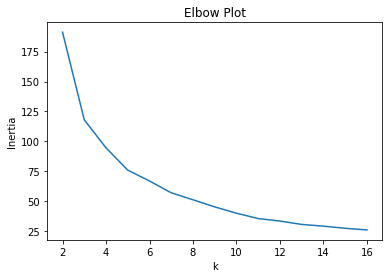

In [5]:
from sklearn.cluster import KMeans

inertia_by_k = []

for k in range(2, 17):
    print(k)
    km = KMeans(n_clusters=k, random_state=0).fit(train_data)
    inertia_by_k.append([k, km.inertia_])

inertia_by_k = np.array(inertia_by_k)
print(inertia_by_k)
fig = plt.figure(figsize=(6,4))
ax1 = fig.add_subplot(111)
ax1.plot(inertia_by_k[:, 0], inertia_by_k[:, 1])
ax1.set_xlabel('k')
ax1.set_ylabel('Inertia')
ax1.set_title('Elbow Plot')
plt.show()


So, what value will we choose for k? What will this number correspond to in the RBF network?

In [7]:
k = 11

km = KMeans(n_clusters=k, random_state=0).fit(train_data)

print(km.cluster_centers_)

# The other thing you need is for each of these, the activation function
activations = 

[[ 1.87478939 -0.22476186  1.40637252  0.94381891]
 [-1.39490838  0.17321097 -1.4409355  -1.42243798]
 [ 0.01762275 -0.07698265  0.33297293  0.28776785]
 [-0.2515599  -1.33384232  0.15355143 -0.00511209]
 [-0.93129451  1.06401026 -1.36596791 -1.27035341]
 [ 0.87435948  0.42065522  0.93466087  1.29719187]
 [ 1.03601431  0.08454345  0.45710758  0.2728576 ]
 [-0.65678631  2.06409742 -1.34649581 -1.28712745]
 [-1.17530181 -1.74035787 -0.58416304 -0.49203829]
 [ 2.05779487  1.72386158  1.38446641  1.3463957 ]
 [ 0.39447846 -0.78357345  0.79056732  0.82304587]]


# Define the Activation Function for the Hidden Nodes

Recall that a typical activation function for the hidden nodes is the Gaussian, so something like $exp \left( - \frac{||\vec{d}-\vec{\mu_j}||^2}{2\delta_j^2 + \epsilon} \right)$, where $\vec{d}$ is the data point, $\vec{\mu_j}$ is the prototype, $\delta_j$ is the hidden unit's standard deviation, $\epsilon$ is a small constant and $||.||^2$ is the squared Euclidean distance.

Let's take a good look at this activation function. 
* What is in the numerator? Why look, it's the distance! Why would we not just use the distance itself as the activation function? 
* What is the function of $\delta_j$?
* Why do we have $\epsilon$?

$exp \left( - \frac{||\vec{d}-\vec{\mu_j}||}{3} \right)$

# What Will We Do When We Get a New Data Point?

At this point, we have defined:
* The input layer (ish)
* The hidden layer

For a new data point, we will:
1. encode it using the same zscoring we did on train - not defining a new zscoring. IE use mean and stdev from the *training data*
2. send it to each of the hidden layer nodes (so the weights from the input layer to the hidden layer are all 1)
3. each hidden layer node will calculate its activation for this data point

On Monday we will define the output layer, and explain how it relates to another analysis method we already know well, linear regression. We will then show how we can *also use RBF networks for regression*!